# Práctica 3: Aplicación de Business Intelligence y Minería de Datos

# 1. Carga y Exploración del Dataset

In [15]:
import os
import pandas as pd

# Leer todos los archivos de la carpeta 'emails'
ruta = "emails/"
documentos = []
nombres = []

for archivo in os.listdir(ruta):
    if archivo.endswith(".txt"):
        with open(os.path.join(ruta, archivo), 'r', encoding='utf-8', errors='ignore') as f:
            documentos.append(f.read())
            nombres.append(archivo)

df_original = pd.DataFrame({'archivo': nombres, 'contenido': documentos})
df_original.head()

,archivo,contenido
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,From: stssdxb@st.unocal.com (Dorin Baru)\nSubj...
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,From: scott@psy.uwa.oz.au (Scott Fisher)\nSubj...
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,"From: abou@dam.cee.clarkson.edu (Abou Bakr,Dam..."
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,From: noye@midway.uchicago.edu (vera shanti no...
4,01627f1c2797f307ee229359e54509470b0b647c.txt,From: ryan_cousineau@compdyn.questor.org (Ryan...


In [16]:
# copiamos del original para trabajar
df = df_original.copy()

In [ ]:
# Backup de los datos a CSV para no estar leyendo los archivos cada vez, de necesitar
df.to_csv('emails.csv', index=False)

## 1.1 Cargar desde CSV

In [31]:
# Lectura desde CSV
import pandas as pd
df = pd.read_csv('emails.csv')
df.head()

,archivo,contenido
0,7db80a12e23f905866a55ce791b2f3524270195e.txt,From: KSLOAN@UCSVAX.UCS.UMASS.EDU (DUNCAN M CH...
1,05a1ff921b017e51480bb0cdd845935dc0580e07.txt,From: sciamanda@edinboro.edu\nSubject: Re: Out...
2,c14c2155bcc638e375e31954fe57bc73c8f5bf4a.txt,From: kebarnes@msuvx1.memst.edu\nSubject: Drug...
3,c2c384aa7bbfb0bb12f8c8a0d21d93cd2d3d08d1.txt,From: caralv@caralv.auto-trol.com (Carol Alvin...
4,5e9d30f5c7bed4f4cc4b80551d33a03f040bd27c.txt,From: carlos@beowulf.Jpl.Nasa.Gov (Carlos Carr...


In [25]:
df

,archivo,contenido
0,7db80a12e23f905866a55ce791b2f3524270195e.txt,From: KSLOAN@UCSVAX.UCS.UMASS.EDU (DUNCAN M CH...
1,05a1ff921b017e51480bb0cdd845935dc0580e07.txt,From: sciamanda@edinboro.edu\nSubject: Re: Out...
2,c14c2155bcc638e375e31954fe57bc73c8f5bf4a.txt,From: kebarnes@msuvx1.memst.edu\nSubject: Drug...
3,c2c384aa7bbfb0bb12f8c8a0d21d93cd2d3d08d1.txt,From: caralv@caralv.auto-trol.com (Carol Alvin...
4,5e9d30f5c7bed4f4cc4b80551d33a03f040bd27c.txt,From: carlos@beowulf.Jpl.Nasa.Gov (Carlos Carr...
...,...,...
18823,12df5ce4a51eeaadc8ff8ee57efc37a86d069f68.txt,From: tmc@spartan.ac.BrockU.CA (Tim Ciceran)\n...
18824,0ad39f86f593646c74fb18b36ad7731fb8e4d099.txt,From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fu...
18825,eaa31dafc01e1b71b9341bb2ec89358132543237.txt,From: tlilley@jarthur.claremont.edu (Ted)\nSub...
18826,ab545fbc400aa4df576cb4e144848c9534b9eeb8.txt,From: dls@Autodesk.COM (Daniel Louis Smith)\nS...


## 1.2. Exploración Inicial

In [32]:
# Número total de documentos
print(f"Número total de documentos: {len(df)}")

# Longitud promedio
df['longitud'] = df['contenido'].apply(len)
print(f"Longitud promedio del texto: {df['longitud'].mean():.2f}")

# Ejemplos de textos
df['contenido'].sample(3).values

Número total de documentos: 18828
Longitud promedio del texto: 1801.11


array(["From: chrisb@seachg.com (Chris Blask)\nSubject: Re: islamic authority over women\n\nsnm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>In article <1993Apr7.163445.1203@wam.umd.edu> west@next02.wam.umd.edu writes:\n>>> >> And belief causes far more horrors.\n>>> >> Crusades, \n>>> >> the emasculation and internment of Native Americans,  \n>>> >> the killing of various tribes in South America.\n>>> >-the Inquisition\n>>> >-the Counter-reformation and the wars that followed\n>>> >-the Salem witch trials\n>>> >-the European witch hunts\n>>> >-the holy wars of the middle east\n>>> >-the colonization/destruction of Africa\n>>> >-the wars between Christianity and Islam (post crusade)\n>>> >-the genocide (biblical) of the Canaanites and Philistines\n>>> >-Aryian invasion of India\n>>> >-the attempted genocide of Jews by Nazi Germany\n>>> >-the current missionary assaults on tribes in Africa\n>>> \n>>> I think all the horrors you mentioned are due to *lack* of people\n>>> following rel

In [33]:
# dividimos en columnas para tener el compo body limpio
import re

def parse_email(texto):
    # Extraer campo From
    match_from = re.search(r'^From:\s*(.*)', texto, re.MULTILINE)
    from_ = match_from.group(1).strip() if match_from else None

    # Extraer campo Subject
    match_subject = re.search(r'^Subject:\s*(.*)', texto, re.MULTILINE)
    subject = match_subject.group(1).strip() if match_subject else None

    # Determinar si es respuesta
    es_respuesta = subject.lower().startswith("re:") if subject else False

    # Eliminar encabezados (todo hasta la primera línea vacía)
    body = re.split(r'\n\s*\n', texto, maxsplit=1)
    body = body[1].strip() if len(body) > 1 else texto

    # Eliminar la firma antes de buscar citas
    body_limpio = re.split(r'\n--\s*\n', body)[0]  # toma solo lo que está antes de la firma (en correos antiguos -- separa la firma)

    # 5. Dividir el cuerpo en líneas
    lineas = body_limpio.splitlines()

    # 6. Marcar si cada línea es una cita (empieza con al menos un '>')
    patrones_omitir = [
        r'other stuff deleted',
        r'text omitted',
        r'message removed',
        r'content skipped',
    ]
    niveles_cita = []
    for linea in lineas:
        m = re.match(r'^(>+)', linea)
        if m:
            contenido = linea[m.end():].strip()
            simbolos = sum(1 for c in contenido if not c.isalnum())
            letras = sum(1 for c in contenido if c.isalnum())

            es_decorativa = (
                letras < 5 or
                simbolos > letras or
                len(contenido.split()) < 3 or
                any(re.search(pat, contenido, re.IGNORECASE) for pat in patrones_omitir)
            )

            if not es_decorativa:
                niveles_cita.append(len(m.group(1)))
            else:
                niveles_cita.append(0)
        else:
            niveles_cita.append(0)


    # 7. ¿El correo tiene al menos una cita?
    tiene_cita = any(n > 0 for n in niveles_cita)

    # 8. Nivel máximo de citas encontradas
    nivel_maximo_cita = max(niveles_cita) if niveles_cita else 0

    return pd.Series([from_, subject, es_respuesta, body, tiene_cita, nivel_maximo_cita])

# Aplicamos al DataFrame original
df[['from', 'subject', 'es_respuesta', 'body', 'tiene_cita', 'nivel_maximo_cita']] = df['contenido'].apply(parse_email)
df = df.drop(columns=['contenido'])  # opcional podemos quitar el contenido
df.head()


,archivo,longitud,from,subject,es_respuesta,body,tiene_cita,nivel_maximo_cita
0,7db80a12e23f905866a55ce791b2f3524270195e.txt,3067,KSLOAN@UCSVAX.UCS.UMASS.EDU (DUNCAN M CHESLEY),"Don't ""repair"" that sticky mouse button--CALL ...",False,------ X-posted to comp.sys.mac.hardware and m...,False,0
1,05a1ff921b017e51480bb0cdd845935dc0580e07.txt,1239,sciamanda@edinboro.edu,Re: Outdoor FM Antennas,True,"In article <beerb.9.0@ccmail.dayton.saic.com>,...",True,1
2,c14c2155bcc638e375e31954fe57bc73c8f5bf4a.txt,12739,kebarnes@msuvx1.memst.edu,Drugs And Crime: A New Approach (was Re: If Dr...,False,wdstarr@athena.mit.edu (William December Starr...,True,2
3,c2c384aa7bbfb0bb12f8c8a0d21d93cd2d3d08d1.txt,1584,caralv@caralv.auto-trol.com (Carol Alvin),Re: The arrogance of Christians,True,vbv@r2d2.eeap.cwru.edu (Virgilio (Dean) B. Vel...,True,1
4,5e9d30f5c7bed4f4cc4b80551d33a03f040bd27c.txt,997,carlos@beowulf.Jpl.Nasa.Gov (Carlos Carrion),Re: The Role of the National News Media in Inf...,True,In article <15377@optilink.COM> cramer@optilin...,True,1


Distribución de correos que son respuesta (Re:):
es_respuesta
True     12350
False     6478
Name: count, dtype: int64

Porcentaje de correos que contienen al menos una cita: 50.19%
numero minimo de citas 0
numero maximo de citas 6


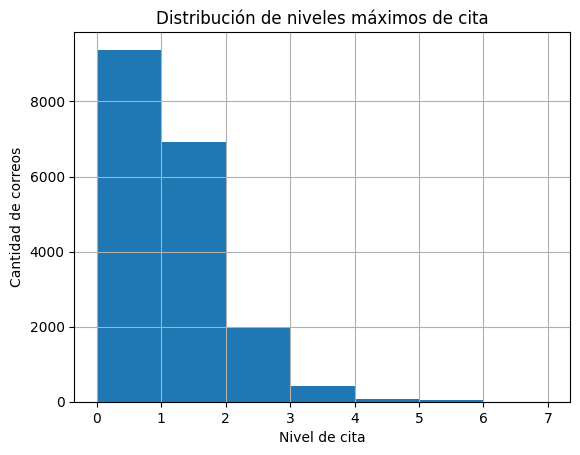

In [34]:
# Distribución de respuestas
print("Distribución de correos que son respuesta (Re:):")
print(df['es_respuesta'].value_counts())

# Correos que contienen citas
print(f"\nPorcentaje de correos que contienen al menos una cita: {df['tiene_cita'].mean() * 100:.2f}%")

print(f"numero minimo de citas",df['nivel_maximo_cita'].min())
print(f"numero maximo de citas",df['nivel_maximo_cita'].max())

# Histograma del nivel máximo de cita
import matplotlib.pyplot as plt

df['nivel_maximo_cita'].hist(bins=range(0, df['nivel_maximo_cita'].max()+2))
plt.title("Distribución de niveles máximos de cita")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")
plt.show()

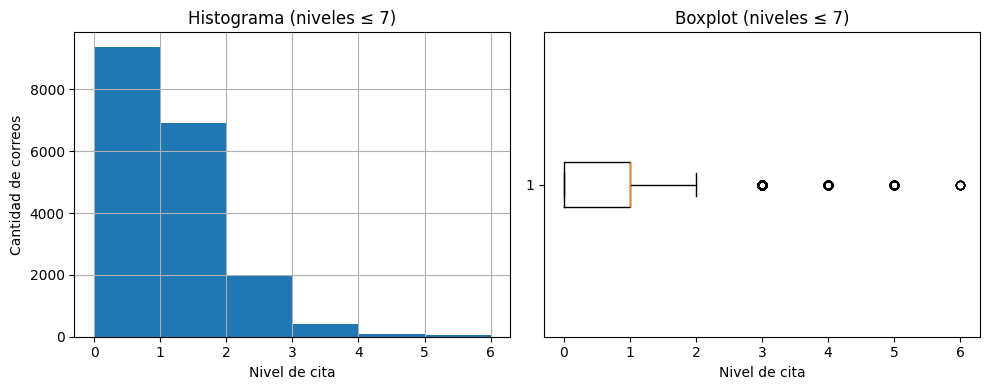

In [35]:
import matplotlib.pyplot as plt

# Filtrar niveles razonables (e.g. hasta 7)
niveles_filtrados = df[df['nivel_maximo_cita'] <= 7]['nivel_maximo_cita']

plt.figure(figsize=(10, 4))

# Histograma
plt.subplot(1, 2, 1)
niveles_filtrados.hist(bins=range(0, 7))
plt.title("Histograma (niveles ≤ 7)")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(niveles_filtrados, vert=False)
plt.title("Boxplot (niveles ≤ 7)")
plt.xlabel("Nivel de cita")

plt.tight_layout()
plt.show()


# 2. Preprocesamiento de Texto

Agregamos libreria NLTK que es una libreria con lenguaje humano que nos ayudara a analizar texto, y tqdm para barras de progreso
- escogimos stemming que se trata de reducir una palabra a raiz dado que ya viene von nltk y tiene muy buen performance con grandes cantidades de datos

In [ ]:
!pip install nltk tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 163.8 kB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 584.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 212.1 kB/s eta 0:00:00 kB/s eta 0:00:01


In [38]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt') # un tokenizador pre-entrenado.
nltk.download('stopwords') # identificador se refiere a una lista de palabras vacías (stopwords) en varios idiomas
nltk.download('punkt_tab') # identificador se refiere a un modelo adicional para el tokenizador "punkt"

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def limpiar_texto(texto):
    texto = texto.lower() # ponemos en minusculas
    tokens = word_tokenize(texto) # dividimos en palabras individuales
    tokens = [t for t in tokens if t.isalpha()] # filtramos - solo texto
    tokens = [t for t in tokens if t not in stop_words] # quitamos - palabras muy comunes que no aportan significado como "el", "la", "y"
    tokens = [stemmer.stem(t) for t in tokens] # aplicacmos stemming - reducimos las palabras a su raíz (por ejemplo: "jugando" → "jug")
    return " ".join(tokens)

df['texto_limpio'] = df['body'].apply(limpiar_texto)
df[['archivo', 'texto_limpio']].head()


[nltk_data] Downloading package punkt to /home/gaston/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/gaston/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /home/gaston/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,archivo,texto_limpio
0,7db80a12e23f905866a55ce791b2f3524270195e.txt,heard appl great new custom support program we...
1,05a1ff921b017e51480bb0cdd845935dc0580e07.txt,articl beerb bradle beer write interest buy bu...
2,c14c2155bcc638e375e31954fe57bc73c8f5bf4a.txt,wdstarr william decemb starr write articl keba...
3,c2c384aa7bbfb0bb12f8c8a0d21d93cd2d3d08d1.txt,vbv virgilio dean velasco write thought share ...
4,5e9d30f5c7bed4f4cc4b80551d33a03f040bd27c.txt,articl cramer clayton cramer write sick contin...


# 3. Vectorización del Texto (TF-IDF)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
# - max_df=0.8: ignora palabras que aparecen en más del 80% de los documentos (poco informativas)
# - min_df=5: ignora palabras que aparecen en menos de 5 documentos (poco relevantes o ruido)
vectorizador_tfidf = TfidfVectorizer(max_df=0.8, min_df=5)
X = vectorizador_tfidf.fit_transform(df['texto_limpio']) # aplica la vectorizacion

# Mostramos la forma (shape) de la matriz resultante:
# - filas = número de documentos
# - columnas = número de términos únicos seleccionados
print(f"Shape del TF-IDF: {X.shape}")


Shape del TF-IDF: (18828, 18680)


# 4 - Análisis de Clustering:  Clustering No Supervisado (K-Means)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm # para barra de progreso

# Listas para guardar resultados
inertia = []       # Inercia de cada modelo KMeans
sil_scores = []    # Puntuación Silhouette
K = list(range(2, 11))   # Rango de valores de k a evaluar

# Iteramos sobre distintos valores de k
for k in tqdm(K, desc="Evaluando valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Crear modelo con k clusters
    kmeans.fit(X)                                   # Ajustar modelo al conjunto TF-IDF
    inertia.append(kmeans.inertia_)                 # Guardar la inercia
    sil_scores.append(silhouette_score(X, kmeans.labels_))  # Guardar Silhouette Score


# 5 - Estimación del número óptimo de clusters

Aplicamos Elbow method y Silhouette

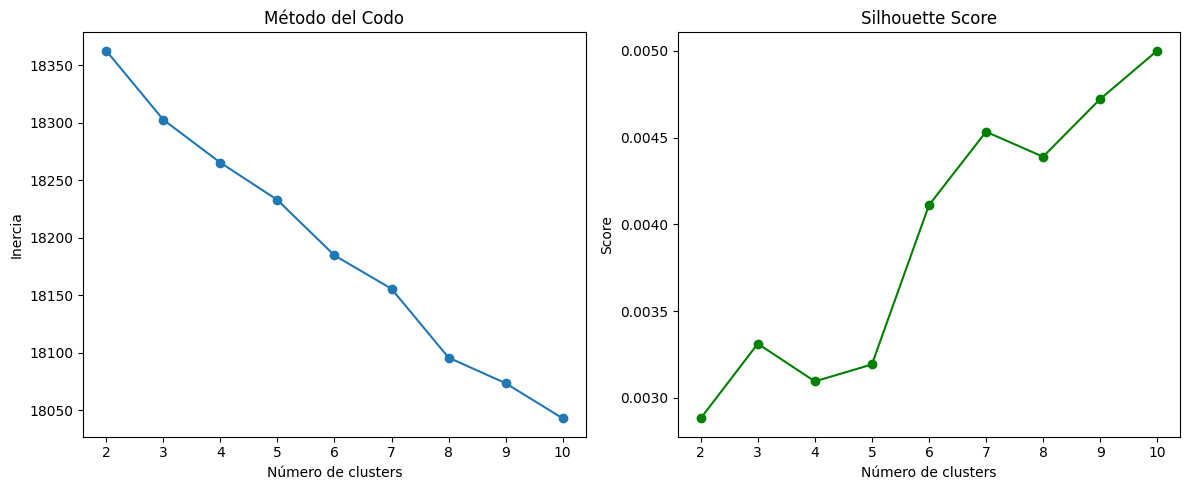

In [49]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

## 5.1 - Aplicación Final del Modelo

Basado en el método del codo y el Silhouette Score podemos ver que el número de clusters adecuado se encuentra entre 6 y 10, siendo 7 un buen punto de equilibrio entre simplicidad del modelo y separación de los grupos. Entonces usaremos "k=7"

In [50]:
# Elegimos el mejor k (por ejemplo, k=7 basado en los gráficos)
modelo_final = KMeans(n_clusters=7, random_state=42)

# Ajustar el modelo y asignar los clusters al DataFrame
df['cluster'] = modelo_final.fit_predict(X)

# Ver ejemplos por cluster
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Ejemplos del Cluster {c} ---")
    print(df[df['cluster'] == c]['body'].sample(1).values[0][:500]) # Muestra 1 ejemplo (primeros 500 caracteres)



--- Ejemplos del Cluster 0 ---
I have some questions about this subject.  I like to leave my
computer on if I think I'm going to be using it withing the next 2 or
3 hours, but I get sick of my Dad constantly coming up to me and
asking "Why is the computer on if you're not using it?"  I also
wonder about my computer being harmed by fluctuations in voltage from
other things (garbage disposal, etc.)  Here are my questions:
 
How much harm do voltage fluctuations cause?  My computer does not
share a circuit with anything big but 

--- Ejemplos del Cluster 1 ---
WHAT IS THE FLANK DRIVE EVERYONES TALKING ABOUT?

--- Ejemplos del Cluster 2 ---
In article <5031@cvbnetPrime.COM> tbelmont@feds55.prime.com (Tom Belmonte x4858) writes:
 |I am considering buying Borland's Paradox for Windows since I
 |would like to use a database with Windows (I don't have/use
 |one yet) for both work/home use.  I would like to advantage
 |of Borland's "$129.95 until April 30" offer if this package
 |is everything

# 7. Reducción de Dimensionalidad y Visualización (opcional)

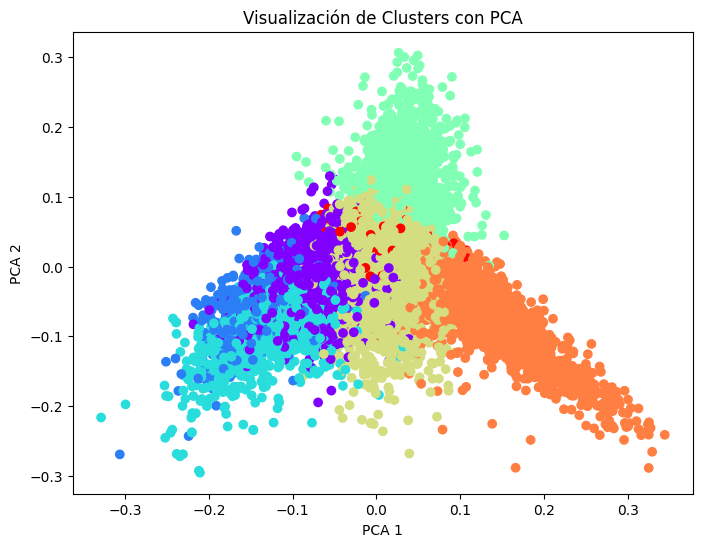

In [51]:
from sklearn.decomposition import PCA  # Importa PCA para reducción de dimensionalidad

# Crear el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Aplicar PCA al conjunto de datos (convertido a array denso)
X_pca = pca.fit_transform(X.toarray())

# Crear figura para graficar
plt.figure(figsize=(8,6))

# Graficar los documentos en 2D, coloreados por su cluster
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='rainbow')

# Títulos y etiquetas del gráfico
plt.title("Visualización de Clusters con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Mostrar la figura
plt.show()

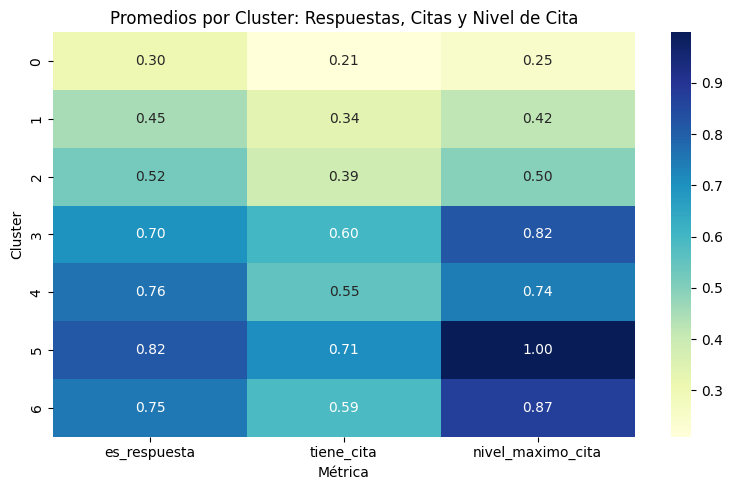

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por cluster y calcular el promedio de las métricas clave
resumen_clusters = df.groupby('cluster')[['es_respuesta', 'tiene_cita', 'nivel_maximo_cita']].mean()

# Crear el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(resumen_clusters, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Promedios por Cluster: Respuestas, Citas y Nivel de Cita")
plt.ylabel("Cluster")
plt.xlabel("Métrica")
plt.tight_layout()
plt.show()


In [58]:
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {c} ---")
    print(df[df['cluster'] == c]['subject'].sample(3).values)  # o ['body']



--- Cluster 0 ---
['Re: graphics libraries' 'Reaction-Diffusion techniques'
 ':Help with XClearArea']

--- Cluster 1 ---
['Re: Do the 2MB ATI Ultra Pro 16 and 24 bit Windows Drivers Work?'
 'Re: No 32-bit box on Gateway' 'Need info on WD7000']

--- Cluster 2 ---
['Wanted: AIRCONDITIONER' 'Re: app-defaults files'
 'Mwm title-drag crashes X server (SIGPIPE)']

--- Cluster 3 ---
['Re: European expansion and our f*cked system' 'Re: Jack Morris'
 'Re: BUFFALO 4, Boston 0: Defense!!']

--- Cluster 4 ---
['Re: Need help with video detection circuit'
 'Re: Looking for X windows on a PC' 'Challenge to Microsoft supporters.']

--- Cluster 5 ---
['Re: homosexual issues in Christianity'
 'Re: Genocide is Caused by Atheism' 'Re: Was Jesus Black?']

--- Cluster 6 ---
['Top of the line JVC portable disc player for sale'
 'Re: V4 V6 V8 V12 Vx?' 'Re: MBenz 300 series, VW Passat']
